In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Főfüggvény

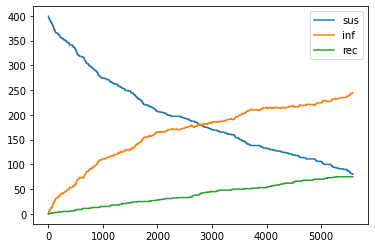

In [8]:
L = 20
inf = 1 #staring infected number
beta = 0.8
gamma = 0.01
alpha = 0.01
limit = 0.8

lattice = np.ones([L,L], dtype=int) # 1 is susceptible

place = np.random.randint(0,L, size=2)
lattice[place[0], place[1]] = 2   #infected
# print(lattice)

sus, inf, rec, t, case = iterate_square(lattice, beta, gamma, alpha, limit)

plt.plot(range(len(sus)), sus, range(len(sus)), inf, range(len(sus)), rec)
plt.legend(['sus', 'inf', 'rec'])
plt.show()

### Iterátor

In [2]:
def iterate_square(lattice, beta, gamma, alpha, limit):
    N = np.shape(lattice)[0] * np.shape(lattice)[1]
    case = np.zeros(N, dtype=int)
    sus = []
    inf = []
    rec = []
    sus.append(len(np.where(lattice == 1)[0]))
    inf.append(len(np.where(lattice == 2)[0]))
    rec.append(len(np.where(lattice == 3)[0]))
    case_count = [case_update(lattice, case)]

    t = 0
    while not (len(np.where(lattice == 2)[0]) == 0 or case_count[-1] >= N*limit ):
        x,y = np.where(lattice == 2)
        i = np.random.randint(0,len(x))

        inf.append(infecting(x[i], y[i], beta))
        rec.append(recovering(x[i], y[i], gamma))
        sus.append(len(np.where(lattice == 1)[0]))
        case_count.append(case_update(lattice, case))
        t += 1
        # print(lattice)
        # print('------------')
    return sus, inf, rec, t, case_count[-1]

In [3]:
def case_update(lattice, case):
    L = np.shape(lattice)[0]
    x,y = np.where(lattice == 2)
    for i in range(len(x)):
        case[x[i]*L + y[i]] = 1  # 1 if they were ever infected 
    return len(np.where(case == 1)[0])

### Megfertőzések eszkalálása

In [4]:
def infecting(x, y, beta):
    L = np.shape(lattice)[0]

    iter = np.arange(4)
    np.random.shuffle(iter)
    for n in iter:    #shuffle for randomness on ther cardinal directions
        if n == 0 and x-1 >= 0: #up
            infect_chance(x - 1, y, beta)
            break
        elif n == 1 and y+1 < L: #right
            infect_chance(x, y + 1, beta)
            break
        elif n == 2 and x+1 < L: #down
            infect_chance(x + 1, y, beta)
            break
        elif n == 3 and y-1 >= 0: #left
            infect_chance(x, y - 1, beta)
            break
    return len(np.where(lattice == 2)[0])
                
def infect_chance(x, y, beta):
    p = np.random.random()
    if p < beta and lattice[x,y] == 1:
        lattice[x, y] = 2

### Meggyógyulás

In [5]:
def recovering(x, y, gamma):
    p = np.random.random()
    if p < gamma:
        lattice[x, y] = 3
    return len(np.where(lattice == 3)[0])

### Immunitás elvesztése

In [89]:
def losing_immunity():
    pass